In [1]:
import matplotlib.pyplot as plt
import numpy as np
class FunctionPlotter():
    def __init__(self,function,
    domain=0,CustomDomain=None,
    ticks=[np.linspace(-5,5,5),np.linspace(-5,5,5)],
    lim=[(-5,5),(-5,5)]):
        '''
        params: 
        function: the function to be plotted
        domain: the range of x 
                default: 0: [-5,5]
                1:[0,10]
                2:[-10,0]
                or other array like value of x
        '''
        self.function = function
        self.xticks, self.yticks = ticks[0],ticks[1]
        self.xlim,self.ylim = lim[0],lim[1]
        if domain == 0 :
            self.x = np.linspace(-5,5,101)
        elif domain == 1:
            self.x = np.linspace(0,10,101)
        elif domain == 2:
            self.x = np.linspace(-10,0,101)
        elif domain == 3:
            self.x = CustomDomain
    def canvas(self):
        self.fig,self.ax = plt.subplots()
        self.ax.spines["left"].set_position(("axes", 0.5))
        self.ax.spines["bottom"].set_position(("axes", 0.5))
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        #self.ax.plot(1, 0, ">k", transform=self.ax.get_yaxis_transform(), clip_on=False)
        #self.ax.plot(0, 1, "^k", transform=self.ax.get_xaxis_transform(), clip_on=False)
        self.ax.set_xlabel('x',x=1)
        self.ax.set_ylabel('y',y=1)
        self.ax.set_xticks(self.xticks)
        self.ax.set_yticks(self.yticks)
        self.ax.set_xlim(self.xlim)
        self.ax.set_ylim(self.ylim)
    def plot(self):
        self.y = self.function(self.x)
        self.canvas()
        self.ax.plot(self.x,self.y)
    def PlotMultiFunction(self):
        self.y = [function(self.x) for function in self.function]
        self.canvas()
        for i in range(len(self.function)):
            self.ax.plot(self.x,self.y[i],label='f({})'.format(i+1))
            self.ax.legend()
    def PlotContour(self):
        self.y = self.x
        X,Y = np.meshgrid(self.x,self.y)
        self.canvas()
        self.ax.contour(X,Y,f(X,Y),0)

# Thomas Calculus
## Chapter 2 Limits and Continuity
### 2.1 Rates of Change and Tangent Lines to Curves
#### Average Rates of Change
#### Slope of a Curve at a Point
#### Instantaneous Rates of Change
### 2.2 Limit of a Function and Limit Laws
#### Limits from Graphs
#### Existence of Limits 
#### Calculating Limits
#### Using Limit Rules
#### Limits of Average Rates of Change
#### Using the Sandwich Theorem
#### Estimating Limits
You will find a graphing calculator useful for Exercises 67–74.

67. Let $f(x) = \dfrac{x^2 - 9}{x + 3}$.   
    a. Make a table of the values of $f$ at the points $x = -3.1,-3.01, -3.001$, and so on as far as your calculator can go.
    Then estimate $\lim\limits_{x\to -3}f(x)$. What estimate do you arrive at if
    you evaluate $f$ at $x = -2.9, -2.99, -2.999,\cdots$ instead?  
    b. Support your conclusions in part (a) by graphing $f$ near $c = -3$ and using Zoom and Trace to estimate $y$-values on the graph as $x \to -3$.  
    c. Find $\lim\limits_{x\to -3}f(x)$ algebraically, as in Example 7.

x      y
-2.9   -5.9000
-2.99   -5.9900
-2.999   -5.9990
-3.1   -6.1000
-3.01   -6.0100
-3.001   -6.0010


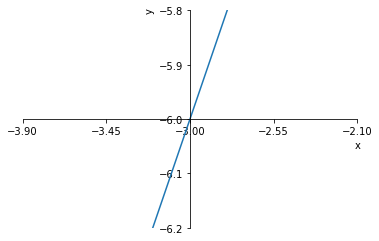

In [9]:
def f(x):
    return (x ** 2 - 9)/(x + 3)
x = [-2.9,-2.99,-2.999,-3.1,-3.01,-3.001]
print('x      y')
for i in x:
    print('{}   {:.4f}'.format(i,f(i)))
FunctionPlotter(f,3,CustomDomain=np.linspace(-3.9,-2.1,20),ticks=[np.linspace(-3.9,-2.1,5),np.linspace(-6.2,-5.8,5)],lim=[(-3.9,-2.1),(-6.2,-5.8)]).plot()

#### Theory and Examples
#### COMPUTER EXPLORATIONS
#### Graphical Estimates of Limits
In Exercises 83–88, use a CAS to perform the following steps:  
a. Plot the function near the point $c$ being approached.  
b. From your plot guess the value of the limit.   

83. $\lim\limits_{x\to 0}\dfrac{x^4 - 16}{x - 2}$

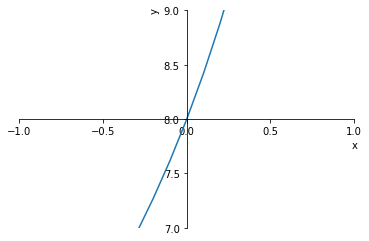

In [16]:
def f(x):
    return (x ** 4 - 16)/(x - 2)
FunctionPlotter(f,3,CustomDomain=np.linspace(-1,1,21),ticks=[np.linspace(-1,1,5),np.linspace(7,9,5)],lim=[(-1,1),(7,9)]).plot()

### 2.3 The Precise Definition of a Limit
#### Centering Intervals About a Point
#### Finding Deltas Graphically
#### Finding Deltas Algebraically
#### Using the Formal Definition
#### Theory and Examples
#### When Is a Number $L$ Not the Limit of $f(x)$ as $x \to c$?
#### COMPUTER EXPLORATIONS
In Exercises 61–66, you will further explore finding deltas graphically. Use a CAS to perform the following steps:  
a. Plot the function $y = f(x)$ near the point $c$ being approached.  
b. Guess the value of the limit $L$ and then evaluate the limit symbolically to see if you guessed correctly.   
c. Using the value $\varepsilon = 0.2$, graph the banding lines $y_1 = L - \varepsilon$ and $y_2 = L + \varepsilon$ together with the function $f$ near $c$.  
d. From your graph in part (c), estimate a $\delta > 0$ such that
$$
|g(x) - k| < \varepsilon\quad\mathsf{whenever}\quad0 < |x| < \delta.
$$
Test your estimate by plotting $f$, $y_1$, and $y_2$ over the interval $0 < |x - c| < \delta$. For your viewing window use $c - 2\delta \le x \le c + 2\delta$ and $L - 2\varepsilon \le x \le L + 2\varepsilon$. If any function values lie outside the interval $[L - \varepsilon, L + \varepsilon]$, your choice of $\delta$ was too large. Try again with a smaller estimate.
e. Repeat parts (c) and (d) successively for $\varepsilon = 0.1, 0.05$, and $0.001$.  

61. $f(x) =\dfrac{x^4 - 81}{x - 3}, c = 3$

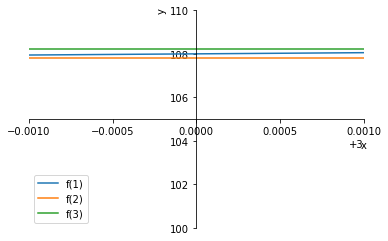

In [26]:
def f(x):
    return (x ** 4 - 81)/(x - 3)
def y1(x):
    return np.array([107.8]*1001)
def y2(x):
    return np.array([108.2]*1001)
FunctionPlotter([f,y1,y2],3,CustomDomain=np.linspace(2.999,3.001,1001),ticks=[np.linspace(2.999,3.001,5),np.linspace(100,110,6)],lim=[(2.999,3.001),(100,110)]).PlotMultiFunction()


### 2.6 Limits Involving Infinity; Asymptotes of Graphs
#### Finding Limits
#### Limits of Rational Functions
#### Infinite Limits
#### Graphing Simple Rational Functions
Graph the rational functions in Exercises 63–68. Include the graphs and equations of the asymptotes and dominant terms.

63. $y = \dfrac{1}{x - 1}$

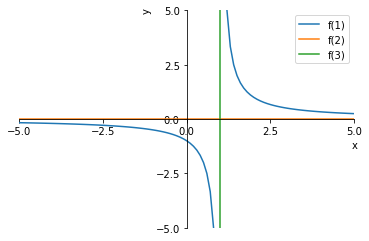

In [35]:
def f(x):
    return 1/(x - 1)
def f2(x):
    return np.array([0]*101)
x = np.array([1]*101)
y = np.linspace(-5,5,101)
a = FunctionPlotter([f,f2])
a.PlotMultiFunction()
a.ax.plot(x,y,label='f({})'.format(3))
a.ax.legend()

#### Domains, Ranges, and Asymptotes
#### Inventing Graphs and Functions
In Exercises 73–76, sketch the graph of a function $y = f(x)$ that satisfies the given conditions. No formulas are required—just label the coordinate axes and sketch an appropriate graph. (The answers are not unique, so your graphs may not be exactly like those in the answer section.)

73. $f(0) = 0, f(1) = 2, f(-1) = -2, \lim\limits_{x\to -\infty}f(x) = -1$ and $\lim\limits_{x\to \infty}f(x) = 1$

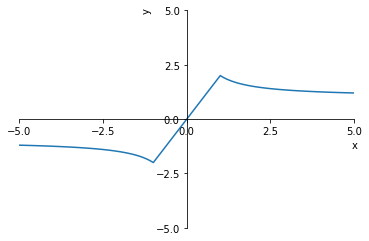

In [57]:
def f(x):
    return np.piecewise(x,[x<-1,np.logical_and(-1<=x,x<=1),x>1],[lambda x:1/x -1,lambda x:2*x,lambda x:1/x + 1])
FunctionPlotter(f,0).plot()

#### Finding Limits of Differences When x u tH
#### Oblique Asymptotes
Graph the rational functions in Exercises 103–108. Include the graphs and equations of the asymptotes.

103. $y = \dfrac{x^2}{x - 1}$

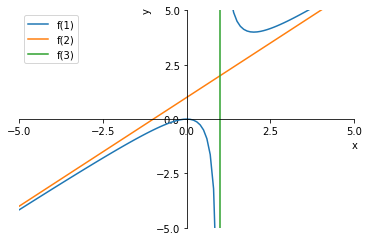

In [60]:
def f(x):
    return x ** 2 /(x - 1)
def f1(x):
    return x + 1
x = np.array([1]*101)
y = np.linspace(-5,5,101)
a = FunctionPlotter([f,f1])
a.PlotMultiFunction()
a.ax.plot(x,y,label='f({})'.format(3))
a.ax.legend()

#### Additional Graphing Exercises
Graph the curves in Exercises 109–112. Explain the relationship between the curve’s formula and what you see.

109. $y = \dfrac{x}{\sqrt{4 - x^2}}$

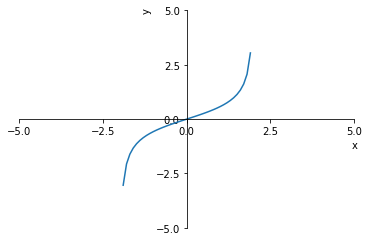

In [61]:
def f(x):
    return x/np.sqrt(4-x**2)
FunctionPlotter(f).plot()

### Practice Exercises
Limits and Continuity
1. Graph the function
   $$
   f(x) = \left\{\begin{aligned}
       1&\quad x \le -1\\
       -x&\quad -1 < x < 0\\
       1&\quad x = 0\\
       -x&\quad 0 < x < 1\\
       1&\quad x \ge 1
   \end{aligned}\right.
   $$
Then discuss, in detail, limits, one-sided limits, continuity, and one-sided continuity of $f$ at $x = -1, 0$, and $1$. Are any of the discontinuities removable? Explain

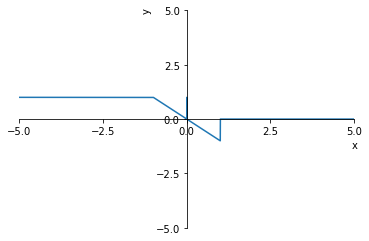

In [4]:
def f(x):
    return np.piecewise(x,[np.logical_or(x<=-1, x == 0, x >= 1) ,np.logical_or(np.logical_and(-1<x,x<0),np.logical_and(x > 0, x < 1))],[lambda x:1,lambda x:0-x])
FunctionPlotter(f,3,np.linspace(-5,5,100001)).plot()